In [1]:
using Pkg
using CSV
using Random
using LinearAlgebra
using Plots
using DataFrames
using DelimitedFiles
using Tables

# Problem1

In [66]:
function split_xnow(start_x,end_x,n_now)
    x = zeros(n_now)
    k = (end_x-start_x)/(n_now-1)
    for i in 1:n_now
      x[i]=start_x + (i-1)*k
    end
    return(x) 
end
function split_xch(start_x,end_x,n_now,c,d)
    n_ch=Int(round((n_now-c)/d))
    x = zeros(n_ch)
    k = (end_x-start_x)/(n_ch-1)
    for i in 1:n_ch
      x[i]=start_x + (i-1)*k
    end
    return(x) 
end


split_xch (generic function with 1 method)

In [67]:
function y(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
        
        for i in 1:b
            
            y[k]=(a[2*i-1]*x[k]-a[2*i])*y[k]
            
        end
               
    end
    return(y) 
end
    

y (generic function with 1 method)

## Example (a):

In [68]:
function act(x)   
    a=[1, 1, 1, 3, 1, 5, 1, 7, 1, 9]
    y=1
    for i in 1:5

        y=(a[2*i-1]*x-a[2*i])*y

    end
    return(y)
end

function Dy(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=5*(x[k])^4-100*(x[k])^3+690*(x[k])^2-1900*x[k]+1689 
    end
    return(y) 
end

function D2y(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=20*(x[k]-5)*((x[k])^2-10*x[k]+19)
    end
    return(y) 
end


D2y (generic function with 1 method)

In [69]:
X=split_xch(0,10,20,0,1)
Y=y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)
yhat=zeros(20)
yhat[1]=y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[1]
for i in 1:19
    yhat[i+1]=y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[i]+
    Dy([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[i]*(X[i+1]-X[i])
end

yhat2=zeros(20)
yhat2[1]=y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[1]
for i in 1:19
    yhat2[i+1]=y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[i]+
    Dy([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[i]*(X[i+1]-X[i])+
    (D2y([1, 1, 1, 3, 1, 5, 1, 7, 1, 9], 5,X)[i]/2)*((X[i+1]-X[i])^2)
end

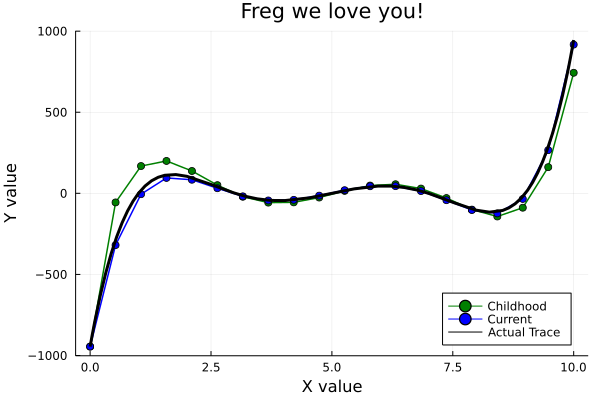

In [70]:
plot(X,yhat,color = "Green",linewidth=1.5,label = "Childhood",shape = :circle)
plot!(X,yhat2,color = "Blue",linewidth=1.5,label = "Current",shape = :circle)
plot!(act,0,10,title = "Freg we love you!",label = "Actual Trace",color = "black",xlabel="X value",
    ylabel="Y value",linewidth=3,legend=:bottomright)

## (b)

In [71]:
a = [1/2, 3/2, 1/3, -1, 1/2, 1, 1/2, -1, 2/5, 2, 2, -1]
b = 6
c = 7
d = 2
n_now = 20
start_x = -3.5
end_x = 5.3


5.3

In [72]:
function act(x) 
    a=[1/2, 3/2, 1/3, -1, 1/2, 1, 1/2, -1, 2/5, 2, 2, -1]
    b=6
    y=1
    for i in 1:b

        y=(a[2*i-1]*x-a[2*i])*y

    end
    return(y)
end
function Dy(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^5)/5 - 
        ((x[k])^4)*3/4 - 
        ((x[k])^3)*31/15 + 
        ((x[k])^2)*117/20 + 
        ((x[k])^1)*137/30 - 5.4
    end
    return(y) 
end

function D2y(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^4) - 
        ((x[k])^3)*3 - 
        ((x[k])^2)*31/5 +
        ((x[k])^1)*117/10 +137/30
    end
    return(y) 
end

D2y (generic function with 1 method)

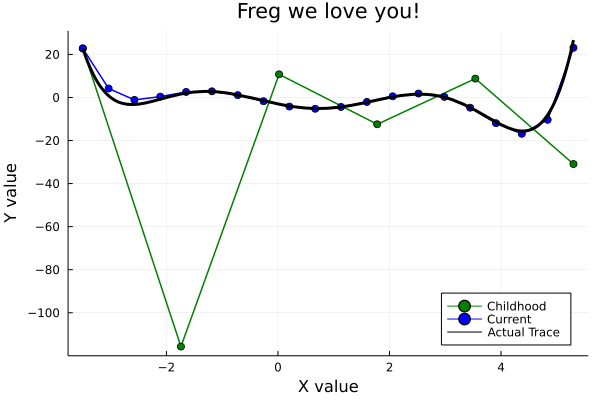

In [73]:
Xch = split_xch(start_x,end_x,n_now,c,d)
Xnow = split_xnow(start_x,end_x,n_now)


yhat=zeros(length(Xch))
yhat[1]=y(a, b,Xch)[1]
for i in 1:(length(Xch)-1)
    yhat[i+1]=y(a, b,Xch)[i]+Dy(a, b,Xch)[i]*(Xch[i+1]-Xch[i])
end

yhat2=zeros(length(Xnow))
yhat2[1]=y(a, b,Xnow)[1]
for i in 1:(length(Xnow)-1)
    yhat2[i+1]=y(a, b,Xnow)[i]+Dy(a, b,Xnow)[i]*(Xnow[i+1]-Xnow[i])+
    (D2y(a, b,Xnow)[i]/2)*((Xnow[i+1]-Xnow[i])^2)
end
plot(Xch,yhat,color = "Green",
    linewidth=1.5,
    label = "Childhood",
    shape = :circle)
plot!(Xnow,yhat2,color = "Blue",linewidth=1.5,label = "Current",shape = :circle)
plot!(act,start_x,end_x,title = "Freg we love you!",
    label = "Actual Trace",
    color = "black",
    xlabel="X value",
    ylabel="Y value",linewidth=3,legend=:bottomright)

## (c)

In [74]:
a = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
b = 6
c = 0
d = 1
n_now = 10
start_x = -4.5
end_x = 6.5

6.5

In [75]:
function act(x) 
    a=[1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
    b=6
    y=1
    for i in 1:b

        y=(a[2*i-1]*x-a[2*i])*y

    end
    return(y)
end
function Dy(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^5)*2.73 - 
        ((x[k])^4)*21.08 - 
        ((x[k])^3)*25.06 + 
        ((x[k])^2)*309.41 - 
        ((x[k])^1)*70.22 - 181.66
    end
    return(y) 
end

function D2y(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^4)*2.73*5 - 
        ((x[k])^3)*21.08*4 - 
        ((x[k])^2)*25.06*3 +
        ((x[k])^1)*309.41*2 - 70.22
    end
    return(y) 
end

D2y (generic function with 1 method)

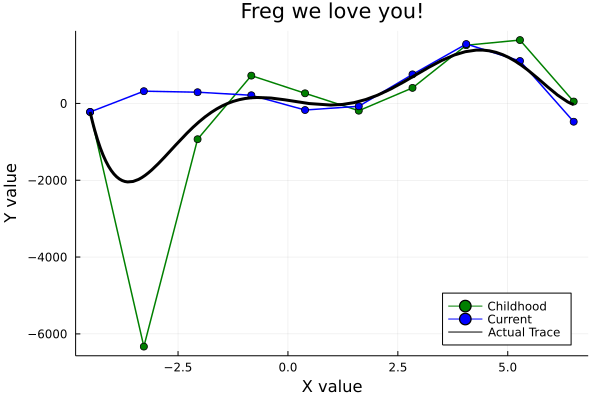

In [76]:
Xch = split_xch(start_x,end_x,n_now,c,d)
Xnow = split_xnow(start_x,end_x,n_now)


yhat=zeros(length(Xch))
yhat[1]=y(a, b,Xch)[1]
for i in 1:(length(Xch)-1)
    yhat[i+1]=y(a, b,Xch)[i]+
    Dy(a, b,Xch)[i]*(Xch[i+1]-Xch[i])
end

yhat2=zeros(length(Xnow))
yhat2[1]=y(a, b,Xnow)[1]
for i in 1:(length(Xnow)-1)
    yhat2[i+1]=y(a, b,Xnow)[i]+
    Dy(a, b,Xnow)[i]*(Xnow[i+1]-Xnow[i])+
    (D2y(a, b,Xnow)[i]/2)*((Xnow[i+1]-Xnow[i])^2)
end
plot(Xch,yhat,
    color = "Green",
    linewidth=1.5,
    label = "Childhood",
    shape = :circle)
plot!(Xnow,yhat2,color = "Blue",
    linewidth=1.5,label = "Current",
    shape = :circle)
plot!(act,start_x,end_x,title = "Freg we love you!",
    label = "Actual Trace",
    color = "black",xlabel="X value",
    ylabel="Y value",linewidth=3,legend=:bottomright)

## (d)

In [77]:
a = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
b = 6
c = 0
d = 1
n_now = 20
start_x = -4.5
end_x = 6.5

6.5

In [78]:
function act(x) 
    a=[1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
    b=6
    y=1
    for i in 1:b

        y=(a[2*i-1]*x-a[2*i])*y

    end
    return(y)
end
function Dy(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^5)*2.73 - 
        ((x[k])^4)*21.08 - 
        ((x[k])^3)*25.06 + 
        ((x[k])^2)*309.41 - 
        ((x[k])^1)*70.22 - 181.66
    end
    return(y) 
end

function D2y(a,b,x) 
    y=ones(length(x))
    for k in 1:length(x)
         y[k]=((x[k])^4)*2.73*5 - 
        ((x[k])^3)*21.08*4 - 
        ((x[k])^2)*25.06*3 +
        ((x[k])^1)*309.41*2 - 70.22
    end
    return(y) 
end

D2y (generic function with 1 method)

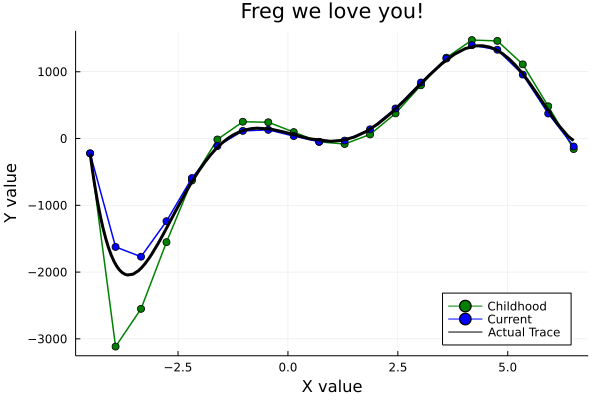

In [79]:
Xch = split_xch(start_x,end_x,n_now,c,d)
Xnow = split_xnow(start_x,end_x,n_now)


yhat=zeros(length(Xch))
yhat[1]=y(a, b,Xch)[1]
for i in 1:(length(Xch)-1)
    yhat[i+1]=y(a, b,Xch)[i]+Dy(a, b,Xch)[i]*(Xch[i+1]-Xch[i])
end

yhat2=zeros(length(Xnow))
yhat2[1]=y(a, b,Xnow)[1]
for i in 1:(length(Xnow)-1)
    yhat2[i+1]=y(a, b,Xnow)[i]+Dy(a, b,Xnow)[i]*(Xnow[i+1]-Xnow[i])+
    (D2y(a, b,Xnow)[i]/2)*((Xnow[i+1]-Xnow[i])^2)
end
plot(Xch,yhat,color = "Green",
    linewidth=1.5,
    label = "Childhood",
    shape = :circle)
plot!(Xnow,yhat2,
    color = "Blue",
    linewidth=1.5,
    label = "Current",
    shape = :circle)
plot!(act,start_x,end_x,title = "Freg we love you!",
    label = "Actual Trace",
    color = "black",
    xlabel="X value",
    ylabel="Y value",linewidth=3,legend=:bottomright)

## (e)

    1. (d) did the better job. The different between (c) and (d) is n_now. When n_now is bigger which means that Df(z)(x-z) in Taylor is smaller. 
    
    2. Second order Taylor approximation did the better job. Because when we use higher order which means that we use more power term to approx oringnal numbers. 
    
    3. Taylor approximation performs a bad approximation when your function looks bumpy.

# Problem2

## Part1

In [80]:
function di(xk ,n , pwi , ci , thi )
    di=log(pwi) + (n/2)*(log(2*pi)) - 0.5*log(det(inv(ci))) -0.5((xk - thi)'inv(ci)*(xk - thi))
    return(di)
end

function cl(i)
    u=zeros(length(i[:,2]))
    u=[
    if true
        u[f]=argmin(i[f,:])
    elseif (i[f,1]==i[f,2])&&(i[f,2]<i[f,3])
        u[f]=1
    elseif (i[f,1]==i[f,3])&&(i[f,3]<i[f,2])
        u[f]=1
    elseif (i[f,2]==i[f,3])&&(i[f,3]<i[f,1])
        u[f]=2
        end for f in 1:length(i[:,2])]
    return(u)
end


cl (generic function with 1 method)

### (a)

In [81]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_M_score1.csv", 
    ',', Float64)
d1 = [di(aa[i,2:4] ,3 , 0.3 , [125 -75 45; -75 310 90; 45 90 440] , [80,90,100] ) 
    for i in 1:length(aa[:,2])]
d2 = [di(aa[i,2:4] ,3 , 0.25 , [300 125 -400; 125 750 -375; -400 -375 900] , [50,60,70] ) 
    for i in 1:length(aa[:,2])]
d3 = [di(aa[i,2:4] ,3 , 0.45 , [360 125 190; 125 250 80; 190 80 160] , [20,30,40] ) 
    for i in 1:length(aa[:,2])]
classify =hcat(d1,d2,d3)
c=cl(classify)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_classify_result1.csv", 
    Tables.table(c), writeheader = false)

"D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_classify_result1.csv"

### (b)

In [82]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_M_score2.csv", ','
    , Float64)
d1 = [di(aa[i,2:4] ,3 , 0.2 , 
    [66.65 62.86 5.78; 62.86 77.46 -8.41; 5.78 -8.41 140.11] , [87.96,61.85,118.42] ) 
    for i in 1:length(aa[:,2])]
d2 = [di(aa[i,2:4] ,3 , 0.5 , 
    [161.54 53.49 39.35; 53.49 177.16 64.00; 39.35 64.00 159.26] , [127.69,116.18,80.31] ) 
    for i in 1:length(aa[:,2])]
d3 = [di(aa[i,2:4] ,3 , 0.3 , 
    [29.93 27.92 12.57; 27.92 35.09 1.90; 12.57 1.90 137.73] , [74.90,49.92,92.98] ) 
    for i in 1:length(aa[:,2])]
classify =hcat(d1,d2,d3)
c=cl(classify)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_classify_result2.csv", 
    Tables.table(c), writeheader = false)

"D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Anny_classify_result2.csv"

## Part2

### example

In [83]:
function li(x)
    li=(log(0.3) + (2/2)*(log(2*pi)) - 0.5*log(det(inv( [125 -75 ; -75 310 ]))) -
        0.5((x - [20,30] )'inv( [125 -75 ; -75 310 ])*(x - [20,30])))-
        (log(0.7) + (2/2)*(log(2*pi)) - 0.5*log(det(inv( [300 125 ; 125 750 ]))) -
        0.5((x - [50,60] )'inv( [300 125 ; 125 750 ])*(x - [50,60])))
    if abs(li) < 2*(10)^(-2)
        return(li)
    end
end

li (generic function with 1 method)

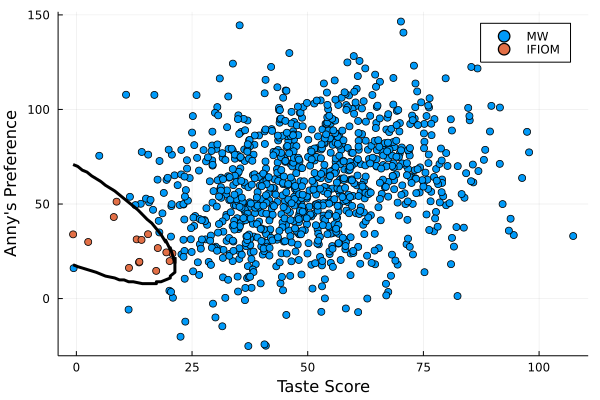

In [84]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\death_threat.csv", ',', 
    Float64)
d1 = [di(aa[i,2:3] ,2 , 0.3 , [125 -75 ; -75 310 ] , [20,30] ) for i in 1:length(aa[:,2])]
d2 = [di(aa[i,2:3] ,2 , 0.7 , [300 125 ; 125 750 ] , [50,60] ) for i in 1:length(aa[:,2])]
d=hcat(d1,d2)
cla=[argmin(d[i,:]) for i in 1:length(aa[:,2])]
aa=hcat(aa,cla)
I=[]
J=[]
for i in minimum(aa[:,2]):maximum(aa[:,2])
    for j in minimum(aa[:,3]):maximum(aa[:,3])
        if li([i,j]) != nothing
            append!(I,i)
            append!(J,j)
        end      
    end
end

JC=[]
IC=[]
for i in findall(J.<=22)
    if (I[i]>=-10)
        append!(JC,J[i])
        append!(IC,I[i])
    end
end
JC2=[]
IC2=[]
for i in findall(J.>=18)
    if (I[i]>=-10)
        append!(JC2,J[i])
        append!(IC2,I[i])
    end
end





plot(xlabel="Taste Score",ylabel="Anny's Preference")

scatter!(aa[:,2],aa[:,3],group=aa[:,4],label=["MW" "IFIOM"])

plot!(IC,JC,color="black",label=nothing,linewidth=3)
plot!(IC2,JC2,color="black",label=nothing,linewidth=3)

### (a)

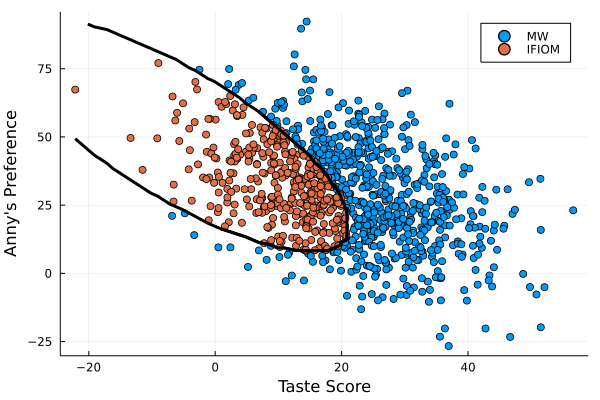

In [85]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\death_threat1.csv", ',', 
    Float64)
d1 = [di(aa[i,2:3] ,2 , 0.3 , [125 -75 ; -75 310 ] , [20,30] ) for i in 1:length(aa[:,2])]
d2 = [di(aa[i,2:3] ,2 , 0.7 , [300 125 ; 125 750 ] , [50,60] ) for i in 1:length(aa[:,2])]
d=hcat(d1,d2)
cla=[argmin(d[i,:]) for i in 1:length(aa[:,2])]
aa=hcat(aa,cla)
I=[]
J=[]
for i in minimum(aa[:,2]):maximum(aa[:,2])
    for j in minimum(aa[:,3]):maximum(aa[:,3])
        if li([i,j]) != nothing
            append!(I,i)
            append!(J,j)
        end      
    end
end

Jg100=[]
Ig100=[]
for i in findall(J.>50)
    if (I[i]<=10)
        append!(Jg100,J[i])
        append!(Ig100,I[i])
    end
end
Jl100=[]
Il100=[]
for i in findall(J.<50)
    if (I[i]<=10)
        append!(Jl100,J[i])
        append!(Il100,I[i])
    end
end

Jg2100=[]
Ig2100=[]
for i in findall(J.>25)
    if (I[i]>=10)
        append!(Jg2100,J[i])
        append!(Ig2100,I[i])
    end
end
Jl2100=[]
Il2100=[]
for i in findall(J.<25)
    if (I[i]>=10)
        append!(Jl2100,J[i])
        append!(Il2100,I[i])
    end
end
JC=[]
IC=[]
for i in findall(J.<20)
    if (I[i]>=0)
        append!(JC,J[i])
        append!(IC,I[i])
    end
end
JC2=[]
IC2=[]
for i in findall(J.>22)
    if (I[i]>=5)
        append!(JC2,J[i])
        append!(IC2,I[i])
    end
end
plot(xlabel="Taste Score",ylabel="Anny's Preference")

scatter!(aa[:,2],aa[:,3],group=aa[:,4],label=["MW" "IFIOM"])

plot!(Ig100,Jg100,color="black",label=nothing,linewidth=3)
plot!(Il100,Jl100,color="black",label=nothing,linewidth=3)
plot!(Ig2100,Jg2100,color="black",label=nothing,linewidth=3)
plot!(Il2100,Jl2100,color="black",label=nothing,linewidth=3)
plot!(IC,JC,color="black",label=nothing,linewidth=3)
plot!(IC2,JC2,color="black",label=nothing,linewidth=3)

### (b)

In [86]:
function li(x)
    li=(log(0.4) + (2/2)*(log(2*pi)) - 0.5*log(det(inv( [1225 -525 ; -525 400 ]))) -
        0.5((x - [80,120] )'inv( [1225 -525 ; -525 400 ])*(x - [80,120])))-
        (log(0.6) + (2/2)*(log(2*pi)) - 0.5*log(det(inv( [900 390 ; 390 400 ]))) -
        0.5((x - [140,150] )'inv( [900 390 ; 390 400 ])*(x - [140,150])))
    if abs(li) < 0.02
        return(li)
    end
end

li (generic function with 1 method)

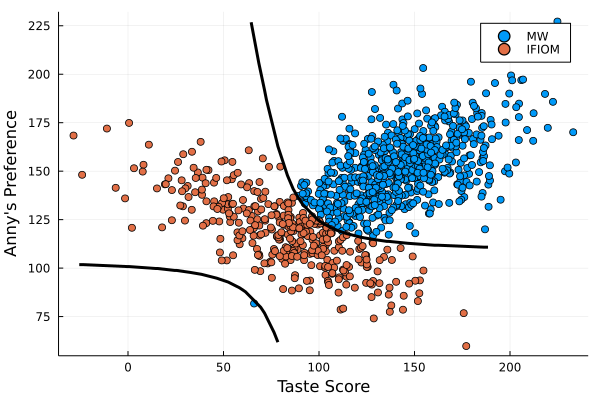

In [87]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\death_threat2.csv", ',', 
    Float64)
d1 = [di(aa[i,2:3] ,2 , 0.4 , [1225 -525 ; -525 400 ] , [80,120] ) for i in 1:length(aa[:,2])]
d2 = [di(aa[i,2:3] ,2 , 0.6 , [900 390 ; 390 400 ] , [140,150] ) for i in 1:length(aa[:,2])]
d=hcat(d1,d2)
cla=[argmin(d[i,:]) for i in 1:length(aa[:,2])]
aa=hcat(aa,cla)
I=[]
J=[]
for i in minimum(aa[:,2]):maximum(aa[:,2])
    for j in minimum(aa[:,3]):maximum(aa[:,3])
        if li([i,j]) != nothing
            append!(I,i)
            append!(J,j)
        end      
    end
end
Jg100=[]
Ig100=[]
for i in findall(J.>110)
    append!(Jg100,J[i])
    append!(Ig100,I[i])
end
Jl100=[]
Il100=[]
for i in findall(J.<110)
    append!(Jl100,J[i])
    append!(Il100,I[i])
end
plot(xlabel="Taste Score",ylabel="Anny's Preference")

scatter!(aa[:,2],aa[:,3],group=aa[:,4],label=["MW" "IFIOM"])

plot!(Ig100,Jg100,color="black",label=nothing,linewidth=3)
plot!(Il100,Jl100,color="black",label=nothing,linewidth=3)

### (c)

I think that this classifier is acceptable. First, in the question situation, the taste of food is subjective even if the standards are complicate or weird. Second, another reason is the criterion that is clear, in other words, there are not have any vague answer.

# Problem3

## exp

In [93]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_outputexp.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.0602   0.004    0.9721  -0.2266  -16.2521
 -0.301   -0.0798  -0.2331  -0.9213    0.4748
 -0.5417   0.8335  -0.0118   0.1077    1.6881
 -0.7825  -0.5467   0.0231   0.2972   -1.6717

## (a)

In [88]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input1.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_output1.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.3568   0.0266   0.313   -0.8798  -267.251
 -0.5398  -0.7788   0.1844   0.261      1.8518
 -0.4752   0.0857  -0.8683  -0.1136    -3.3235
 -0.5963   0.6208   0.3377   0.3807    -8.7935

## (b)

In [89]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input2.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_output2.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.3815   0.3791   0.7516  -0.3819  -507.54
 -0.3321  -0.5633   0.4314   0.6215    60.1258
 -0.5408  -0.5398  -0.294   -0.5742    69.5517
 -0.6721   0.4976  -0.4032   0.3717    33.6675

## (c)

In [90]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input3.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_output3.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.3627  -0.2489   0.5735   0.691   -1039.17
 -0.5136  -0.276    0.4044  -0.7046    -24.6042
 -0.4934   0.8688   0.0247   0.0335    -37.6339
 -0.601   -0.3271  -0.712    0.1576     13.9287

## (d)

In [91]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input4.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_output4.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.37    -0.2238  -0.1556  -0.8882  -1408.32
 -0.5151  -0.4476  -0.5906   0.4308    249.833
 -0.4529   0.8575  -0.2438   0.0152    132.575
 -0.6267  -0.1196   0.7534   0.1592    -60.1752

## (e)

In [92]:
aa = readdlm("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_input5.csv", ',', 
    Float64)
Q,R=qr(aa)
Q=hcat(Q,R[:,5])
Q=round.(Q,digits=4)
CSV.write("D:\\OneDrive - g.ntu.edu.tw\\110\\商管機器學習\\MLBA hw3_ver4\\MLBA hw3\\Metaverse_output5.csv", 
    Tables.table(Q), 
    writeheader = false)
Q

4×5 Matrix{Float64}:
 -0.4073  -0.4063   0.8179  -0.0059  -1381.04
 -0.5126  -0.344   -0.4309  -0.6581    149.336
 -0.4194   0.8462   0.2097  -0.253     -65.7989
 -0.6288  -0.0208  -0.3183   0.7091   -101.56